In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


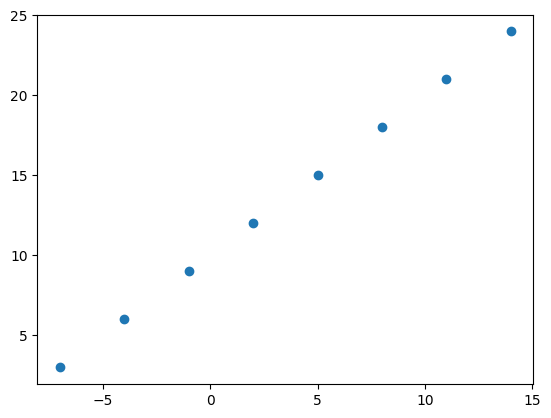

In [ ]:
#create features
X = np.array([-7.0,-4.0 , -1.0 , 2.0, 5.0 , 8.0 , 11.0 , 14.0])

#create labels

y = np.array([3.0 , 6.0 , 9.0 , 12.0 ,15.0, 18.0,21.0 , 24.0])

plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and output shapes

In [ ]:
#create a demo tensor for out housignprediction problem

house_info  = tf.constant(["bedroom","bathroom" , "garage"])  # we are using house_info to get house_price as output
house_price = tf.constant([1000])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000], dtype=int32)>)

In [ ]:
input_shape= X.shape
output_shape = y.shape
input_shape , output_shape

((8,), (8,))

In [ ]:
X[0].shape # is an scalar i.e 1.0 is scalar do .ndim......like we are taking 1 X value to predict 1 y value

()

In [ ]:
#turn numpy into tensor

X = tf.constant(X)
y= tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape= X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

#Steps in moddelling wiith tensorflow

 1. **creating the mode** - define the input and output layer as well as hidden layers of a deep learning model

2. **compiling a mode** - define the loss finction ( in other words the finction which tells out model how wrong it is)  and the optimizer ( tells our model ohow to improve the pattern its learning )  and evaluation metrics (what we can use to interpret the performance of our model)

3. **Fitting of a model** - letting the model try to find patterns between X and y ( features and labels )

In [ ]:
# X = tf.squeeze(X)
# X.shape

X = tf.expand_dims(X, axis=-1) # i have to use this bcz my X was squeezed so i have to create a

X.shape

TensorShape([8, 1])

In [ ]:
tf.random.set_seed(42)

#1. create a model using the Sequential API
# ( i.e creating a model and telling him to go through the layers one by one sequentially usign the Sequential API)

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation= "relu"),

    tf.keras.layers.Dense(1)

    #Dense is basicaally FULLLY CONNECTED LAYER means each neuron is connected with every other neuron of next layer
])

#2. compilee the model

model.compile(loss = tf.keras.losses.mae ,# mae means mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics = ["mae"]  # it is human interpretable values for how well your model is doing
              )


#3. fit the model

model.fit(X,y,epochs = 10)

#4. Evaluate the model on the test data to check how reliable our model is


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - loss: 18.1883 - mae: 18.1883
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 17.9071 - mae: 17.9071
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 17.6258 - mae: 17.6258
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 17.3446 - mae: 17.3446
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 17.0633 - mae: 17.0633
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 16.7821 - mae: 16.7821
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 16.5008 - mae: 16.5008
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.2195 - mae: 16.2195
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.9383 - mae: 15.9383
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.6570 - mae: 15.6570


#we can add layers in our model either as making them iin a list like above or using add method

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100,
activation= "relu"))

model.add(tf.keras.layers.Dense(10))

model.add(tf.keras.layers.Dense(1))

In [ ]:
#prediction using out model
# model.predict([17.0]) mine shows error but sirs dont so we have to conevrt it to numpy first
model.predict(np.array([17.0])) # we cannot directly put tensors in it so we have to conert it into array first

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[-8.609733]], dtype=float32)

# Improving the model

we can improve our model by altering the steps we took to create a model

1. **Creating a model** -  here we might add more layers to inc the number of hidden units called neurons within each o the hidden layers , change the activation of each layer

2. **Compiling  a model** - here we might change the optimization function or perhaos the **learning rate** of the optimiztion function

3. **fiiting a model** -  here we might fit a model for more epocs leaving it for training for longer or on more data ( given the model more examples to learn from)

In [ ]:
X=tf.expand_dims(X,axis=-1)
y=tf.expand_dims(y,axis=-1)

In [ ]:
tf.random.set_seed(42)

#1. create a model using the Sequential API
# ( i.e creating a model and telling him to go through the layers one by one sequentially usign the Sequential API)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "relu" , name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
] ,name="model_1" )

#2. compilee the model

model_1.compile(loss = tf.keras.losses.mae ,# mae means mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"]  # it is human interpretable values for how well your model is doing
              )


#3. fit the model

model_1.fit(X,y,epochs = 100)

#4. Evaluate the model on the test data to check how reliable our model is

 # now it is basically overfitting........

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.7844 - mae: 14.7844
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.8006 - mae: 7.8006
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.2706 - mae: 5.2706
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.5452 - mae: 5.5452
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.1468 - mae: 4.1468
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.1462 - mae: 4.1462
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.7364 - mae: 3.7364
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.4972 - mae: 3.4972
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.6859 - mae: 3.6859
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.8782 - mae: 2.8782
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.2825 - mae: 2.2825
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.4302 - mae: 2.4302
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/ste

In [ ]:
tf.squeeze(X)
X.shape

TensorShape([8, 1, 1])

In [ ]:
model_1.predict(np.array([17.0]))


ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

#Evaluating a model


In practice , a typical workflow you wil l fo through when building a neurak network is :

``` Build a model -> fit it -> evaluate it -> tweak it -> fit it ->evaluate it ->tweak -> fit -> eval - >repeat ```

its what we did it in preevious model

when it comes to evaluation ......there is only VISUALIZE

IN GENERAL IT MEANS :

What data are we working with ?

what does our model look like ?

how does a model perform while it learns ??

How the preductions are done ???

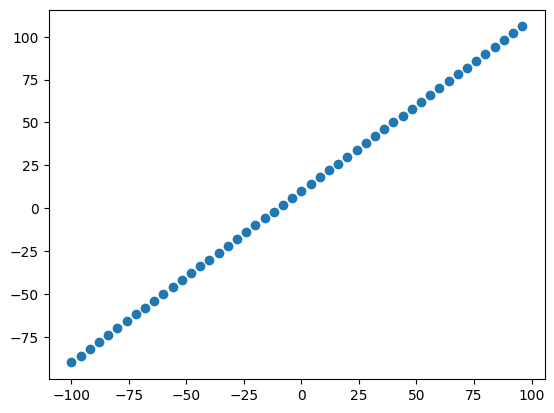

In [ ]:
X = tf.range(-100,100,4)

y = X+10

plt.scatter(X,y)

In [ ]:
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split

# X = tf.range(-100,100,4).numpy() # convert the set to numpy first before using in train_test_split
# y = X+10
# # y=y.numpy()

# X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

# X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [ ]:
# or we can use
tf.random.set_seed(42)

X_train = X[:40]
y_train =y[:40]

X_test = X[40:]
y_test = y[40:]

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((40, 1), (10, 1), (40, 1), (10, 1))

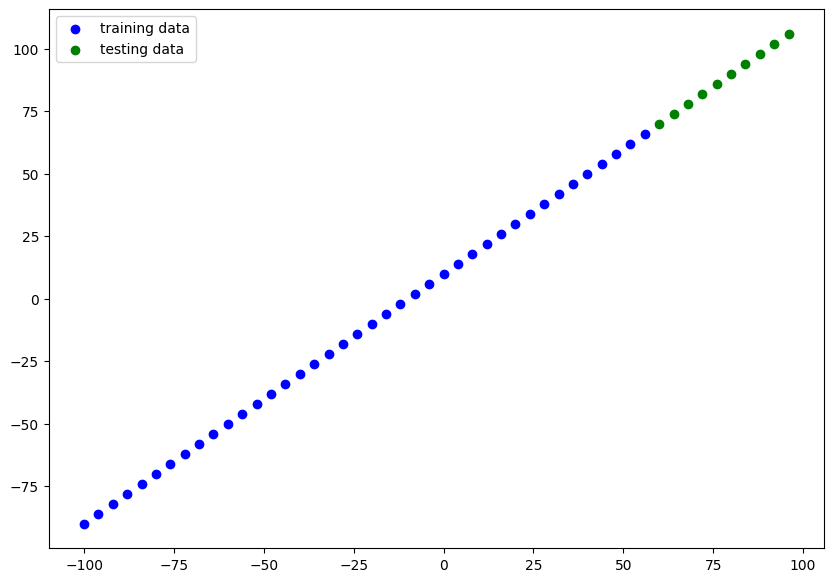

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.legend()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 69.6543 - mae: 69.6543 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.6907 - mae: 34.6907 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0180 - mae: 8.0180 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6518 - mae: 9.6518 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0002 - mae: 8.0002 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6402 - mae: 9.6402 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9823 - mae: 7.9823 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6286 - mae: 9.6286 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9645 - mae: 7.9645 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6169 - mae: 9.6169 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9466 - mae: 7.9466 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6053 - mae: 9.6053 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

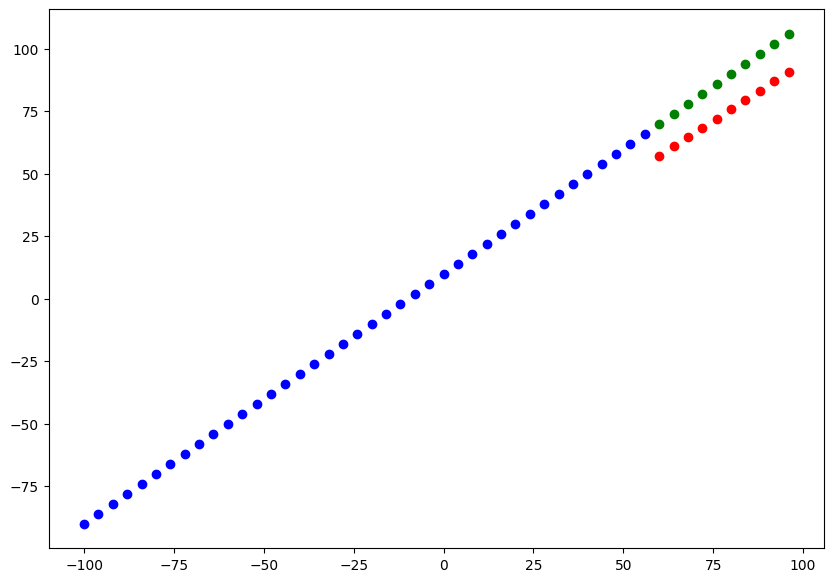

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["mae"])

model_2.fit(X_train , y_train , epochs = 100)

# X_train is training data features or inputs and y_train is the labels or output of the training .....train data and train label ......train input and train output

y_pred = model_2.predict(np.array(X_test))


plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.scatter(X_test,y_pred,c="r",label="testing data")

In [ ]:
X_new = tf.constant(X)
y_new = tf.constant(y)

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# or we can use.....so its better to covert the data to tensor first before using them......
tf.random.set_seed(42)

X_train = X_new[:40]
y_train =y_new[:40]

X_test = X_new[40:]
y_test = y_new[40:]

X_new_train = np.expand_dims(X_train, axis=-1)
X_new_test = np.expand_dims(X_test, axis=-1)

y_new_train = np.expand_dims(y_train, axis=-1)
y_new_test = np.expand_dims(y_test, axis=-1)

X_new_train.shape , X_new_test.shape , y_new_train.shape , y_new_test.shape

((40, 1), (10, 1), (40, 1), (10, 1))

In [ ]:
X_new_train =tf.constant(X_new_train)
X_new_test = tf.constant(X_new_test)
y_new_train = tf.constant(y_new_train)
y_new_test = tf.constant(y_new_test)

X_new_train , X_new_test , y_new_train , y_new_test

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[60],
        [64],
        [68],
        [72],
        [76],
        [80],
        [84],
        [88],
        [92],
        [96]], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],

In [ ]:
#ltes create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= "relu"),

])

model_3.compile(loss = tf.keras.losses.mae ,# mae means mean absolute error
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"]  # it is human interpretable values for how well your model is doing
                )


model_3.fit(X_new_train,y_new_train,epochs = 100)




Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 71.8760 - mae: 71.8760 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 71.8099 - mae: 71.8099 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.7438 - mae: 71.7438 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.6778 - mae: 71.6778
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.6117 - mae: 71.6117 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71.5457 - mae: 71.5457 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71.4796 - mae: 71.4796 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.4136 - mae: 71.4136 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 71.3475 - mae: 71.3475 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71.2814 - mae: 71.2814 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.2153 - mae: 71.2153 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.1493 - mae: 71.1493 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


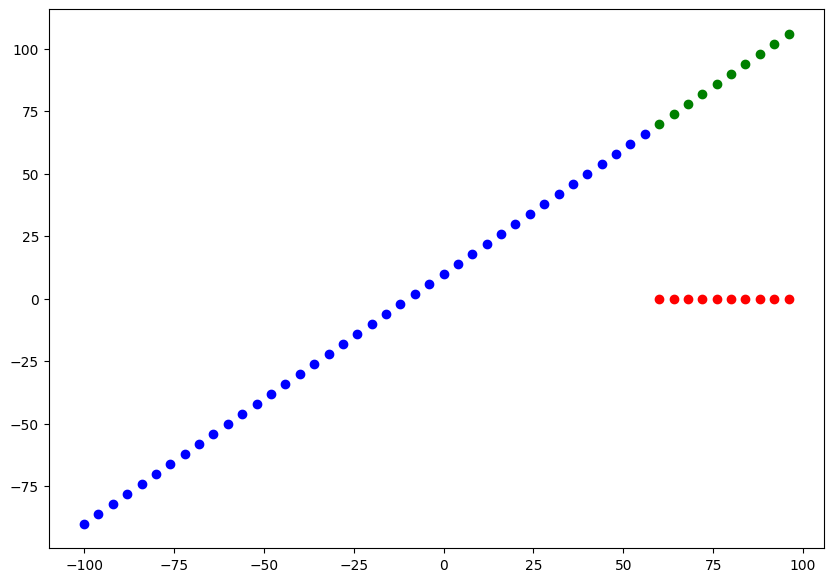

In [ ]:
y_new_pred = model_3.predict(X_new_test)

# using tensor i didnt need it to use np.array()

plt.figure(figsize=(10,7))
plt.scatter(X_new_train,y_new_train,c="b",label="training data")
plt.scatter(X_new_test,y_new_test,c="g",label="testing data")
plt.scatter(X_new_test,y_new_pred,c="r",label="testing data")

In [ ]:
X_new_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84],
       [88],
       [92],
       [96]], dtype=int32)>

In [ ]:
 #Lets create  amodel which builds automatical by defiining the input_shape argument in the layer


tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,
                          input_shape=[1]),

])

model_4.compile(loss = tf.keras.losses.mae,
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics = ["mae"]
 )

model_4.fit(X_new_train,y_new_train,epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 90.7610 - mae: 90.7610
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55.5928 - mae: 55.5928 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.3549 - mae: 21.3549 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5978 - mae: 7.5978 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6297 - mae: 8.6297 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0984 - mae: 10.0984 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8151 - mae: 11.8151 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7394 - mae: 8.7394 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2082 - mae: 10.2082 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9662 - mae: 11.9662 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.7203 - mae: 12.7203
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1868 - mae: 8.1868 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

In [ ]:
X[0]


<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [ ]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 100)              │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

In [ ]:
model_4.summary()
# Dense is FULLY CONNECTED NETWROK
#trainable parans are the parameters the model can update as it trains
#non-trainanble params arent updated during TRAINING ( this is typically when u bring in already learn patterns or parameters from other mdoels during transfer learning)

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#watch https://youtu.be/tpCFfeUEGs8?si=SkwRkLoy6Sfo2x_F from 5:45:00 for about these params thing

In [ ]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
X_train , X_new_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [ 

In [ ]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 100)              │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

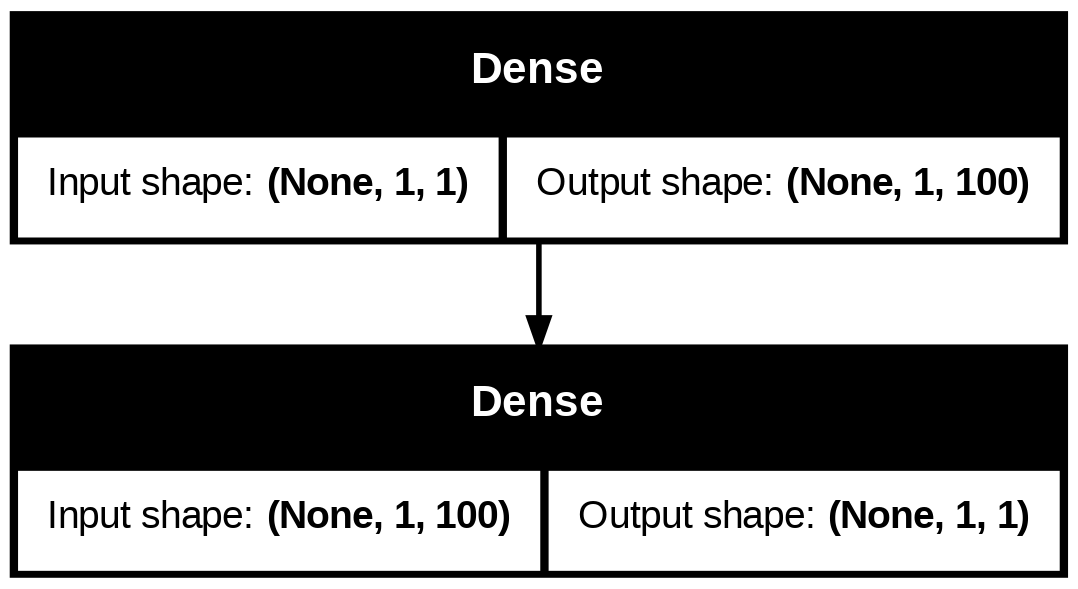

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)
# we  can also name our layer byy putting....name="layername on it"

#Visualize

to visualize predictions , its good idea to plot them against the ground truth labels

often you will see in the form of `y_test` `y_pred`

and i already have done it in before model so practice them

In [ ]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred

    ):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="predictioins")
  plt.legend()



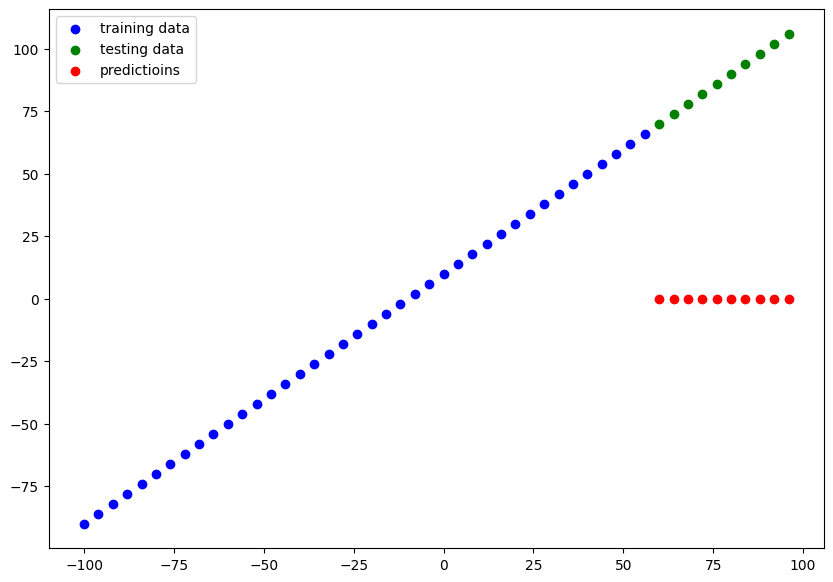

In [ ]:
plot_predictions(X_new_train,y_new_train,X_new_test,y_new_test,y_new_pred)

### Evaluating our models predictions with the regression evalutaion metrics

Depending on the problems you are working on there willl be different evaluation mdetrics to evvaluate your models performance

Since we are working on a regression , two of the main metrics :

* MAE - mean absolute error , on average  ,how wrong is each of my models prediction

* MSE - mean square error , on average , how wrong is each of my models prediction squared  



In [ ]:
model_1.evaluate(X_new_test,y_new_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 2.0779 - mae: 2.0779


[2.077873945236206, 2.077873945236206]

In [ ]:
y_new_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
import tensorflow as tf

# Calculate MAE using the functional API
mae = tf.keras.metrics.MeanAbsoluteError() # initialize the class
mae.update_state(y_true=y_new_test, y_pred=y_new_pred) # update the class with ground truth and predicted values
mae = mae.result().numpy() # Get the result

# Or, create a metric object and update its state
# This part is redundant as it does the same thing as the previous code
# mae_metric = tf.keras.metrics.MeanAbsoluteError()
# mae_metric.update_state(y_new_test, y_new_pred)
# mae = mae_metric.result().numpy()

print(mae)  # Print the MAE value

88.0


In [ ]:
import tensorflow as tf

# Use tf.keras.metrics.MeanSquaredError for calculating MSE as a metric
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_new_test, y_new_pred)
mse = mse.result().numpy()
print(mse)

7876.0


### Running experiments to improve our model

1. Get more data - get more examples for ur model to train on

2. Make yout model larger using a more complex modeel - this migh tcome in form of layers or more hidden units in each layer

3. train for longer -= give ur model more chance to find patterns in the data

Lets do 3 modelling experiments ⁉

1. `model` - same as the origina model , 1 layer , trained for 100 epochs

2. `model_1` - 2 layers , trained for 100 epochs

3. `model_5` - 2 layers , trained for 500 epochs



#Build new model from start


In [ ]:
A = tf.range(-100,100,4)
A

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
tf.random.set_seed(42)

A_train = X[:40]
b_train =y[:40]

A_test = X[40:]
b_test = y[40:]

# A_train = np.expand_dims(X_train, axis=-1) only run them 1 time
# b_test = np.expand_dims(X_test, axis=-1)

# b_train = np.expand_dims(y_train, axis=-1)
# b_test = np.expand_dims(y_test, axis=-1)

A_train.shape , A_test.shape , b_train.shape , b_test.shape

((40, 1), TensorShape([10]), (40, 1), (10, 1))

In [ ]:
tf.random.set_seed(42)

new_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
] ,name="new_model_0" )

#2. compilee the model

new_model_0.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )


#3. fit the model

new_model_0.fit(A_train,b_train,epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.4272 - mae: 22.4272 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6739 - mae: 8.6739
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.4354 - mae: 8.4354
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1906 - mae: 9.1906
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2499 - mae: 8.2499 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9298 - mae: 8.9298 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9620 - mae: 7.9620 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6145 - mae: 9.6145
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9442 - mae: 7.9442
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6029 - mae: 9.6029
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.9263 - mae: 7.9263
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5913 - mae: 9.5913
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


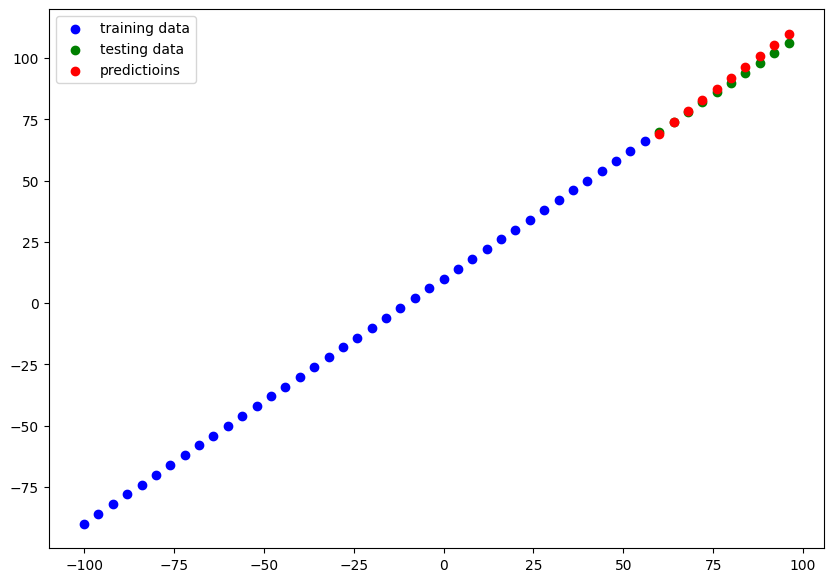

In [ ]:
new_y_pred_0 = new_model_0.predict(A_test)
plot_predictions(A_train,b_train,A_test,b_test,new_y_pred_0)

In [ ]:
tf.random.set_seed(42)

new_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
] ,name="new_model_1" )

#2. compilee the model

new_model_1.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )


#3. fit the model

new_model_1.fit(A_train,b_train,epochs = 200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.3899 - mae: 76.3899 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.3319 - mae: 41.3319 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5251 - mae: 10.5251 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0671 - mae: 8.0671 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7736 - mae: 9.7736 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0493 - mae: 8.0493 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7620 - mae: 9.7620 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0314 - mae: 8.0314 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7504 - mae: 9.7504 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0136 - mae: 8.0136 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7388 - mae: 9.7388 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1209 - mae: 8.1209
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


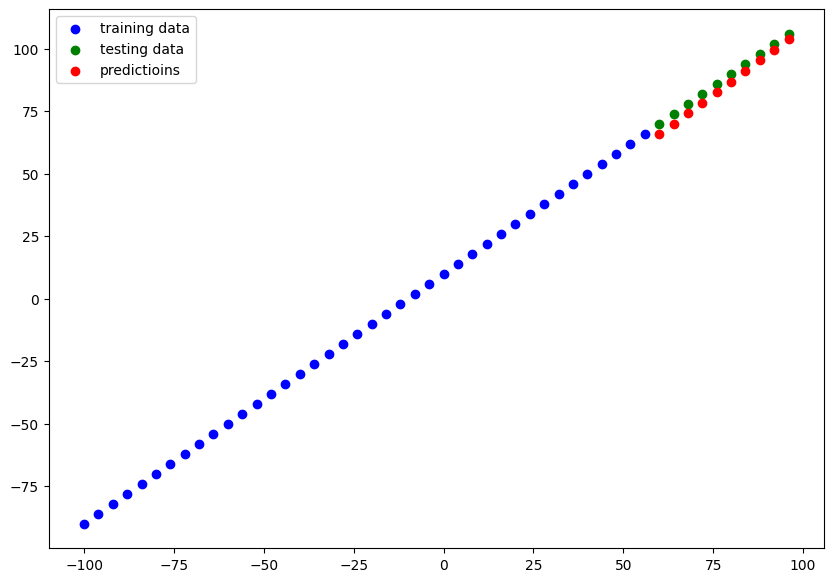

In [ ]:
new_y_pred_1 = new_model_1.predict(A_test)
plot_predictions(A_train,b_train,A_test,b_test,new_y_pred_1)

In [ ]:
tf.random.set_seed(42)

new_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
] ,name="new_model_1" )

#2. compilee the model

new_model_2.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )


#3. fit the model

new_model_2.fit(A_train,b_train,epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.6091 - mae: 19.6091 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5307 - mae: 10.5307 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0597 - mae: 8.0597 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7770 - mae: 9.7770 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0419 - mae: 8.0419 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7653 - mae: 9.7653 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1491 - mae: 8.1491 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6921 - mae: 8.6921 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5588 - mae: 8.5588 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3273 - mae: 8.3273 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0693 - mae: 9.0693 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1418 - mae: 8.1418 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


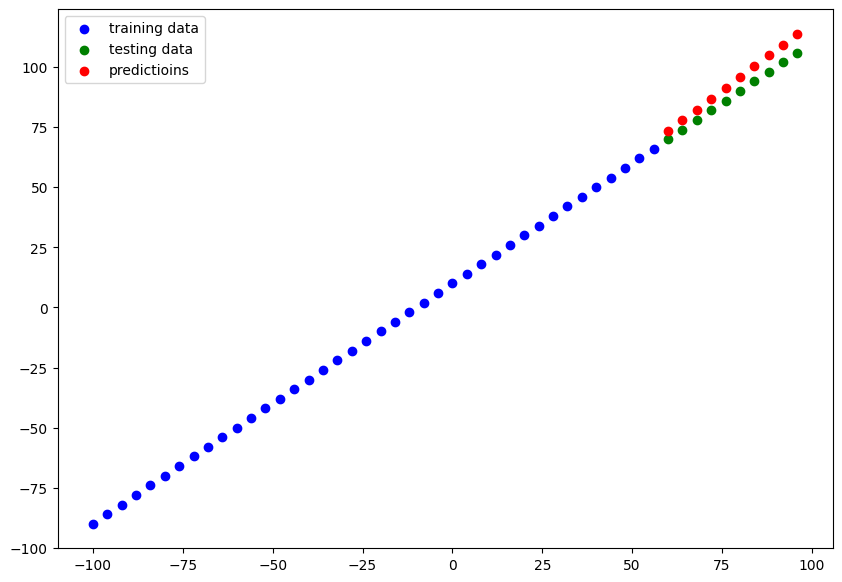

In [ ]:
new_y_pred_2= new_model_2.predict(A_test)
plot_predictions(A_train,b_train,A_test,b_test,new_y_pred_2)

In [ ]:
tf.random.set_seed(42)

new_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
] ,name="new_model_3" )

#2. compilee the model

new_model_3.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )


#3. fit the model

new_model_3.fit(A_train,b_train,epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 49.8922 - mae: 49.8922 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.3488 - mae: 23.3488 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1205 - mae: 22.1205 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5255 - mae: 22.5255 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8851 - mae: 14.8851 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5416 - mae: 15.5416 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8324 - mae: 15.8324 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.2957 - mae: 11.2957 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.1154 - mae: 15.1154 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0157 - mae: 11.0157
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8299 - mae: 14.8299 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9038 - mae: 10.9038
Epoch 13/100
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


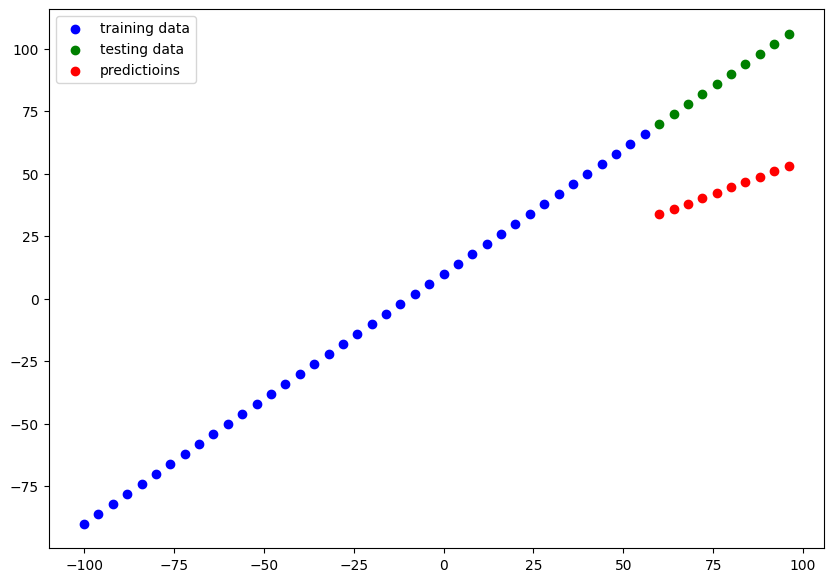

In [ ]:
new_y_pred_3= new_model_3.predict(A_test).squeeze()
plot_predictions(A_train,b_train,A_test,b_test,new_y_pred_3)

In [ ]:
tf.random.set_seed(42)

new_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
] ,name="new_model_4" )

#2. compilee the model

new_model_4.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )


#3. fit the model

new_model_4.fit(A_train,b_train,epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 40.3326 - mae: 40.3326 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.7588 - mae: 30.7588 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.0522 - mae: 27.0522
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9989 - mae: 15.9989 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9403 - mae: 18.9403 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.7502 - mae: 12.7502 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.1533 - mae: 18.1533 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.4938 - mae: 13.4938 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.9027 - mae: 14.9027 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8475 - mae: 15.8475 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9984 - mae: 11.9984 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0180 - mae: 15.0180 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


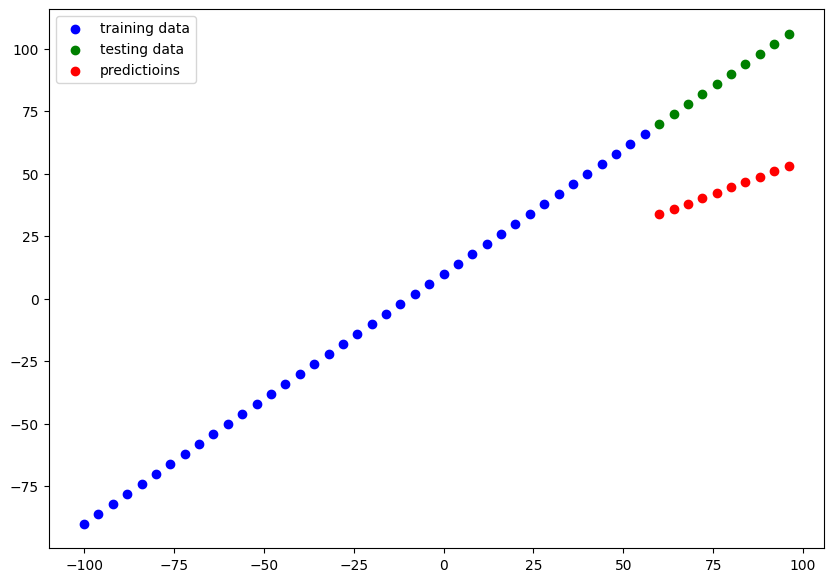

In [ ]:
new_y_pred_4= new_model_4.predict(A_test).squeeze()
plot_predictions(A_train,b_train,A_test,b_test,new_y_pred_4)

#comparing thr result of our experiments

In [ ]:
model_0_avg_error = tf.reduce_mean(tf.abs(new_y_pred_0 - b_test))
model_1_avg_error = tf.reduce_mean(tf.abs(new_y_pred_1 - b_test))
model_2_avg_error = tf.reduce_mean(tf.abs(new_y_pred_2 - b_test))
model_3_avg_error = tf.reduce_mean(tf.abs(new_y_pred_3 - b_test))
model_4_avg_error = tf.reduce_mean(tf.abs(y_new_pred_4 - b_test))

model_1_avg_error.numpy(), model_2_avg_error.numpy(), model_3_avg_error.numpy(), model_4_avg_error.numpy()

# Calculate MAE for each model separately

model_0_mae = tf.keras.metrics.MeanAbsoluteError()
model_0_mae.update_state(y_true=b_test, y_pred=new_y_pred_0)
model_0_mae = model_0_mae.result().numpy()

model_1_mae = tf.keras.metrics.MeanAbsoluteError()
model_1_mae.update_state(y_true=b_test, y_pred=new_y_pred_1)
model_1_mae = model_1_mae.result().numpy()

model_2_mae = tf.keras.metrics.MeanAbsoluteError()
model_2_mae.update_state(y_true=b_test, y_pred=new_y_pred_2)
model_2_mae = model_2_mae.result().numpy()

model_3_mae = tf.keras.metrics.MeanAbsoluteError()
model_3_mae.update_state(y_true=b_test, y_pred=new_y_pred_3)
model_3_mae = model_3_mae.result().numpy()

model_4_mae = tf.keras.metrics.MeanAbsoluteError()
model_4_mae.update_state(y_true=b_test, y_pred=new_y_pred_4)
model_4_mae = model_4_mae.result().numpy()

model_0_mae, model_1_mae, model_2_mae, model_3_mae, model_4_mae

(1.785833, 3.2076294, 5.564889, 44.5409, 44.556988)

In [ ]:
import pandas as pd

model_results = [["new_model_0" ,model_0_mae],
                 ["new_model_1",model_1_mae],
                 ["new_model_2",model_2_mae],
                 ["new_model_3",model_3_mae],
                 ["new_model_4",model_4_mae]
                 ]

all_model_results = pd.DataFrame(model_results,columns=["model","mae"])
all_model_results

,model,mae
0,new_model_0,1.785833
1,new_model_1,3.207629
2,new_model_2,5.564889
3,new_model_3,44.540901
4,new_model_4,44.556988


#Saving our Models

There are 2 main formats we can save our models too :

1. The SavedModel format
2. The HDF5 format



In [364]:
new_model_1.save("Best_regression_model_SavedModel_format.keras")  # read the documentation too about what does it really saves in model and what we can retrieve when we load it
 # Best_regression_model is the file path we wanna save to


In [365]:
#2 HDF5

new_model_1.save("Best_regression_model_HDF5_format.h5")

#Loading the saved model

In [366]:
#laod in the savedmodel format

loaded_SavedModel_format=  tf.keras.models.load_model("/content/Best_regression_model_SavedModel_format.keras")

loaded_SavedModel_format.summary()

Model: "new_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)                    │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [367]:
#compare new_model_1 predictions with the SavedModel fomrat modl predicitons just to check whether they are correct or not


new_model_1_preds =  new_model_1.predict(A_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(A_test)
new_model_1_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [368]:
#2 load H5 model

loaded_H5_format=  tf.keras.models.load_model("/content/Best_regression_model_HDF5_format.h5")

loaded_H5_format.summary()

#and same compare them to check if both are same or not as before


Model: "new_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)                    │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Download a file from google collab or check 7:25:00

# from google.colab import files

# files.download("/content/Best_regression_model_SavedModel_format.keras")

# 7:25:00 - 8:10:00 are recap so watch it if u want

#Preprocessing ( normalization and standardization)

**Normalization** - a technoque yo change the value of numeric coloumns in the dataset to common sacle , without distorting differences in the range of values
or
converting the value between 0 and 1 while preserving the original distribution

**Standardization** - removes the mean and divides each value by standard deviation .......it transform a feature to have close t normal distrivution ( caution : this reduces the effect of outlier )


In [370]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [375]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#create a column transformer

ct =make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#create X and y

C = insurance.drop("charges",axis=1)
D = insurance["charges"]

#build our train and test sets

from sklearn.model_selection import train_test_split

C_train , C_test , D_train , D_test = train_test_split(C,D,test_size=0.2,random_state=42)

#fit the column transformer to our training data

ct.fit(C_train)

#Transforming training and testing data with the normaliztoin (MinMaxScaler ) and OneHotEncoder

C_train_normal = ct.transform(C_train)
C_test_normal = ct.transform(C_test)



In [379]:
# Access the first row of C_train using .iloc
C_train_normal[0], C_train.iloc[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 age                46
 sex            female
 bmi             19.95
 children            2
 smoker             no
 region      northwest
 Name: 560, dtype: object)

In [383]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model_4.fit(C_train_normal,D_train,epochs = 100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 13297.6045 - mae: 13297.6045
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13291.1338 - mae: 13291.1338
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13274.7754 - mae: 13274.7754
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13238.6387 - mae: 13238.6387  
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13171.9844 - mae: 13171.9844 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13063.6445 - mae: 13063.6445
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12902.6377 - mae: 12902.6377
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12678.4775 - mae: 12678.4775
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12381.1875 - mae: 12381.1875
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12002.7363 - mae: 12002.7363
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11549.0410 - mae: 11549.0410
Epoch 12/100
34/34 ━━━━━━━━

In [391]:
insurance_model_4.evaluate(C_test_normal,D_test)

insurance_model_4_preds = insurance_model_4.predict(C_test_normal)

insurance_model_4_preds.shape , C_test_normal.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3517.3872 - mae: 3517.3872 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


((268, 1), (268, 11))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3517.3872 - mae: 3517.3872 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


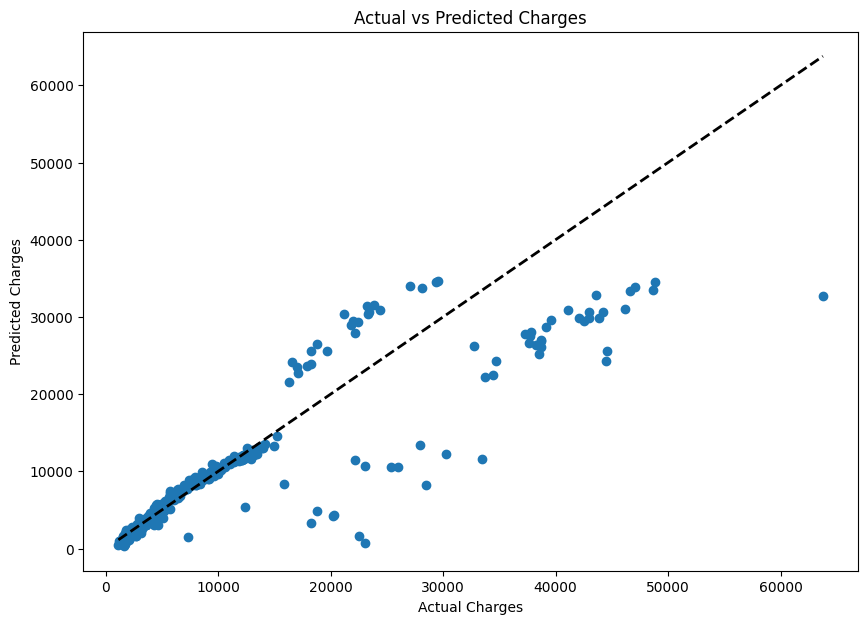

In [392]:
#evaluate our insurance model trained on normalized data

insurance_model_4.evaluate(C_test_normal,D_test)

insurance_model_4_preds = insurance_model_4.predict(C_test_normal)

plt.figure(figsize=(10,7))
# We want to plot the predicted values against the actual values
# so X_axis will be D_test (Actual values)
# and Y_axis will be insurance_model_4_preds (Predicted values)
plt.scatter(D_test, tf.squeeze(insurance_model_4_preds))  # Changed this line
# Plot a line representing perfect predictions
plt.plot([D_test.min(), D_test.max()], [D_test.min(), D_test.max()], 'k--', lw=2)  # Added this line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()